In [1]:
library(ggplot2)  # Plotting
library(gridExtra)  # Grid plotting
library(geosphere) # Spacial coordinates
library("GGally", lib.loc="/Library/Frameworks/R.framework/Versions/3.5/Resources/library")

In [6]:
train_dataset_raw = read.csv("data/train.csv")

In [25]:
# We reduce the dataframe size to be more workable

N = 5000
train_dataset = train_dataset_raw[sample(nrow(train_dataset_raw), N), ]

In [26]:
clusters = kmeans(
    train_dataset[ , c("pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude")],
    centers=20,
    iter.max=50,
    nstart=100,
)
train_dataset$cluster <- factor(clusters$cluster)

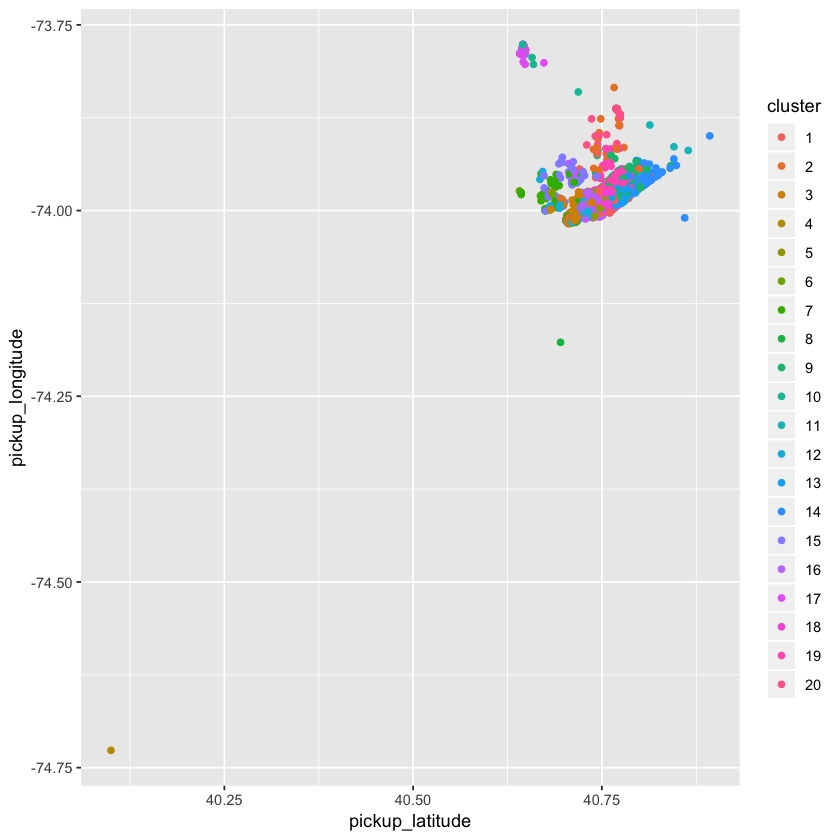

In [27]:
ggplot() + 
  geom_point(data = train_dataset, 
             aes(x = pickup_latitude, 
                 y = pickup_longitude,
                 color = cluster))